## Проанализируем таблицу с факторами успеваемости студентов
Данные: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/tende/PycharmProjects/labs_python/datasets/StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Я русский, поэтому переведу слова)



| Колонка                     | Перевод                             |
|-----------------------------|-------------------------------------|
| Hours_Studied               | Кол-во часов на обучение (в неделю) |
| Attendance                  | Посещаемость                        |
| Parental_Involvement        | Вовлеченность родителей             |
| Access_to_Resources         | Доступ к ресурсам                   |
| Extracurricular_Activities  | Внешкольные занятия                 |
| Sleep_Hours                 | Часы сна                            |
| Previous_Scores             | Предыдущие оценки                   |
| Motivation_Level            | Уровень мотивации                   |
| Internet_Access             | Доступ к интернету                  |
| Tutoring_Sessions           | Занятия с репетитором               |
| Family_Income               | Доход семьи                         |
| Teacher_Quality             | Качество преподавания               |
| School_Type                 | Тип школы                           |
| Peer_Influence              | Влияние сверстников                 |
| Physical_Activity           | Физическая активность               |
| Learning_Disabilities       | Затруднения в обучении              |
| Parental_Education_Level    | Уровень образования родителей       |
| Distance_from_Home          | Расстояние до дома                  |
| Gender                      | Пол                                 |
| Exam_Score                  | Экзаменационная оценка              |



### Проверка пропусков

In [4]:
check_isnan = data.isna().sum()
int(check_isnan.sum())

235

Есть 235 пропусков, анлак...

In [5]:
check_isnan[check_isnan != 0]

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [6]:
data['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [7]:
data['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [8]:
data['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

Так как сильно точных данных нет, то в целом можно заменить их на средние или просто удалить.
Удалим, среднее плохо из-за строковых данных (тут неприятные данные, так как они не цифровые)

Почему данные можно удалить? Чекнем

In [9]:
(float(check_isnan.sum() / len(data))) * 100

3.5568336612683513

3,5 процента пропусков - **мало** с учетом того, что я посчитал их не совсем корректно, тк пропуски могут быть в одной строке, а значит при удалении мы уберем возможно менее процента строк)

In [10]:
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

Теперь при построении графиков все будет корректно отображаться

## 1. График зависимостей (plot), с отображением статистической информации

Данные совсем не подходят для отрисовки `plt.plot()`, нет никакой зависимости от времени и тд. Можно конечно построить график с частью данных, но это неинтересно и не имеет смысла, поэтому почему бы не построить линию плотности распределения для гистограммы

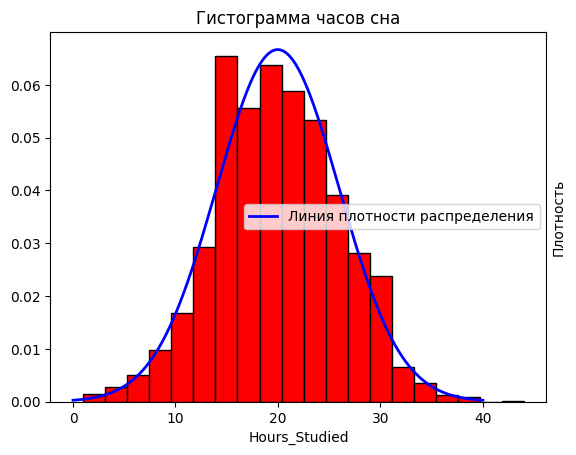

In [11]:
from scipy.stats import norm

plt.hist(data['Hours_Studied'], bins=20, color='red', edgecolor='black', density=True)
plt.title('Гистограмма часов сна')
plt.xlabel('Hours_Studied')
plt.ylabel('Плотность')

mean, std_dev = data['Hours_Studied'].mean(), data['Hours_Studied'].std()

x = np.linspace(0, 40, 1000)
p = norm.pdf(x, mean, std_dev)

plt.plot(x, p, 'blue', linewidth=2, label='Линия плотности распределения')

plt.gca().yaxis.set_label_position('right')
plt.legend()
plt.show()

## 2. График разброса значений (scatter)

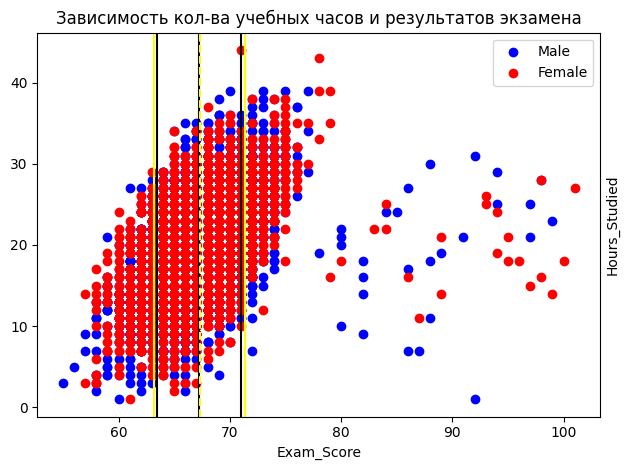

In [12]:
male_mask = data['Gender'] == 'Male'
female_mask = data['Gender'] == 'Female'

plt.scatter(data['Exam_Score'][male_mask], data['Hours_Studied'][male_mask], color='b', label='Male')
plt.scatter(data['Exam_Score'][female_mask], data['Hours_Studied'][female_mask], color='r', label='Female')

plt.legend()
plt.xlabel('Exam_Score')
plt.ylabel('Hours_Studied')

mean_female = data[data['Gender'] == 'Female']['Exam_Score'].mean()
mean_male = data[data['Gender'] == 'Male']['Exam_Score'].mean()
std_female = data[data['Gender'] == 'Female']['Exam_Score'].std()
std_male = data[data['Gender'] == 'Male']['Exam_Score'].std()

plt.axvline(mean_female + std_female, color='yellow')
plt.axvline(mean_male + std_male, color='black')
plt.axvline(mean_male - std_male, color='black')
plt.axvline(mean_male, color='black')
plt.axvline(mean_female, color='yellow', linestyle='--')
plt.axvline(mean_female - std_female, color='yellow')
plt.gca().yaxis.set_label_position('right')
plt.title('Зависимость кол-ва учебных часов и результатов экзамена')
plt.tight_layout()
plt.show()

Соответственно:

**Желтый** - среднее значение результатов экзамена среди **дам** и отклонение от среднего

**Черный** - среднее значение результатов экзамена среди **мужчин** и отклонение от среднего

In [13]:
print(mean_male, mean_female) 

67.23562906724511 67.27472118959108


Средние значения у мужчин и дам примерно одинаковые

## 3. Гистограммы (hist).

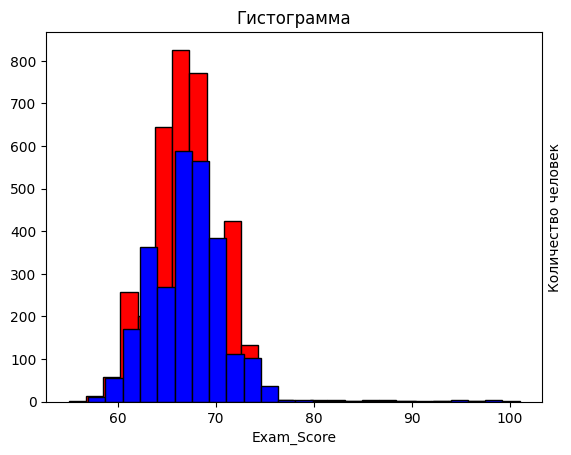

In [14]:
plt.hist(data[data['Gender'] == 'Male']['Exam_Score'], bins=25, color='r', edgecolor='black', label='Male')
plt.hist(data[data['Gender'] == 'Female']['Exam_Score'], bins=25, color='b', edgecolor = 'black', label='Female')
plt.title('Гистограмма')
plt.xlabel('Exam_Score')
plt.ylabel('Количество человек')

plt.gca().yaxis.set_label_position('right')
plt.show()

## 4. Круговые диаграммы (pie).

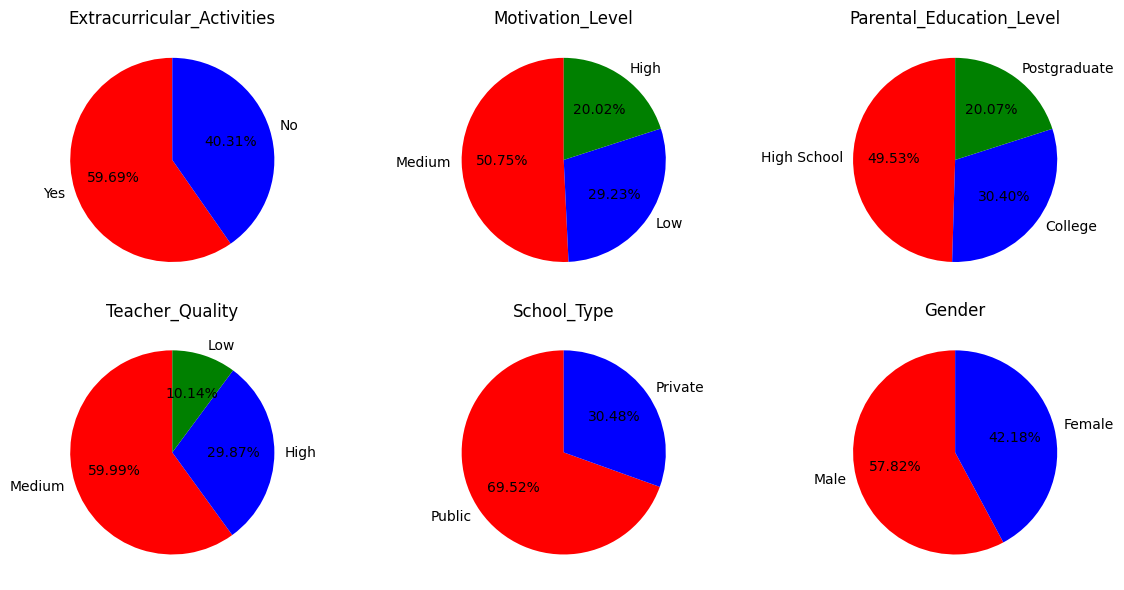

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

choose_cols = ['Extracurricular_Activities', 'Motivation_Level', 'Parental_Education_Level', 'Teacher_Quality', 'School_Type', 'Gender']

for i, ax in enumerate(axs.flat):
    counts = data[choose_cols[i]].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['red', 'blue', 'green'])
    ax.set_title(choose_cols[i])

plt.tight_layout()
plt.show()

## 5. Любой 3-мерный график. 
Данных слишком много для корректного отображения, поэтому возьму срез до 500

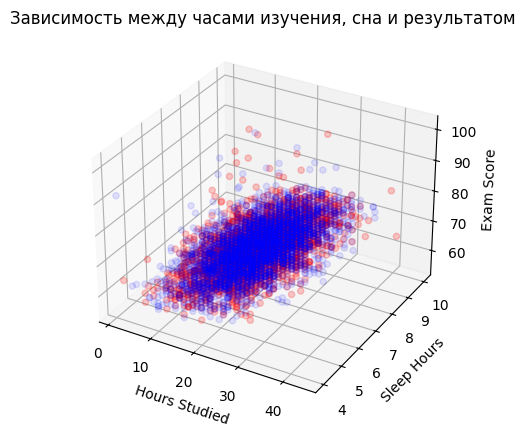

In [16]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

mini_data = data[500:]
male = mini_data[mini_data['Gender'] == 'Male']
female = mini_data[mini_data['Gender'] == 'Female']
ax.scatter(female['Hours_Studied'], female['Sleep_Hours'], female['Exam_Score'], color='red', alpha=0.2)
ax.scatter(male['Hours_Studied'], male['Sleep_Hours'], male['Exam_Score'], color='blue', alpha=0.1)
ax.set_title('Зависимость между часами изучения, сна и результатом')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Exam Score')

plt.show()

## Приколы

In [17]:
cat_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
                'Learning_Disabilities', 'Distance_from_Home', 'Gender']

num_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

In [18]:
cat_data = pd.get_dummies(data[cat_features])  # преобразуем категориальные признаки к виду, который может обработать ml алгоритм
num_data = data[num_features]

In [19]:
X = pd.concat([cat_data, num_data], axis=1)
y = data['Exam_Score']
X.head()

,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,...,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male,Hours_Studied,Attendance,Sleep_Hours,Tutoring_Sessions,Physical_Activity
0,False,True,False,True,False,False,True,False,False,True,...,False,False,True,False,True,23,84,7,0,3
1,False,True,False,False,False,True,True,False,False,True,...,False,True,False,True,False,19,64,8,2,4
2,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,True,24,98,7,2,4
3,False,True,False,False,False,True,False,True,False,False,...,False,True,False,False,True,29,89,8,1,4
4,False,False,True,False,False,True,False,True,False,False,...,False,False,True,True,False,19,92,6,3,4


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.6982999096611286